<a href="https://colab.research.google.com/github/isabelamchaves/Introdu-o-Ci-ncia-de-Dados/blob/main/07_kNN_com_e_sem_padronizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNN com e sem Padronização de Dados




## 1. Introdução

Este código avalia o impacto da padronização no desempenho do algoritmo k-Nearest Neighbors (kNN). Ele compara o modelo kNN aplicado a um conjunto de dados com escalas drasticamente diferentes, antes e depois da padronização, utilizando métricas como matriz de confusão e curva ROC. O objetivo é ilustrar como a padronização melhora a precisão e a separação entre classes.

## 2. Importando as Bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 3. Criando um conjunto de dados sintético

In [ ]:
# Criando um conjunto de dados sintético com escalas extremamente desiguais
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=1.5, random_state=42)

# Multiplicando a segunda variável por um fator muito alto para criar uma disparidade brutal
X[:, 0] *= 1e-3   # Escala da primeira variável drasticamente menor
X[:, 1] *= 1e3    # Escala da segunda variável drasticamente maior

## 4. Padronizando os Dados
A padronização é essencial quando as variáveis possuem escalas diferentes, pois o kNN calcula a distância entre os pontos de dados. Se uma variável tiver uma escala muito maior que outra, ela dominará o cálculo da distância, fazendo com que as outras variáveis tenham pouco impacto na classificação.



In [ ]:
# Salvando os dados antes da padronização
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y
df.to_csv('dados_despadronizados.csv', index=False)

# Aplicando a padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Salvando os dados após a padronização
df_scaled = pd.DataFrame(X_scaled, columns=['Feature 1 Scaled', 'Feature 2 Scaled'])
df_scaled['Target'] = y
df_scaled.to_csv('dados_padronizados.csv', index=False)

## 5. Dividindo o conjunto de dados em treino e teste

In [ ]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## 6.  Treinando o Modelo kNN










In [ ]:
# Treinando o algoritmo kNN no conjunto de treino sem padronização
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Treinando o algoritmo kNN no conjunto de treino com padronização
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier()

## 7. Testando o Modelo kNN

In [ ]:
# Testando o algoritmo no conjunto de teste sem padronização
y_pred = knn.predict(X_test)

# Testando o algoritmo no conjunto de teste com padronização
y_pred_scaled = knn_scaled.predict(X_test_scaled)

## 8. Avaliando o Modelo

In [ ]:
# Avaliando as métricas no conjunto sem padronização
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred)

# Avaliando as métricas no conjunto com padronização
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
accuracy_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
fpr_scaled, tpr_scaled, _ = roc_curve(y_test_scaled, knn_scaled.predict_proba(X_test_scaled)[:, 1])
roc_auc_scaled = roc_auc_score(y_test_scaled, y_pred_scaled)

### 8.1 Matriz de Confusão



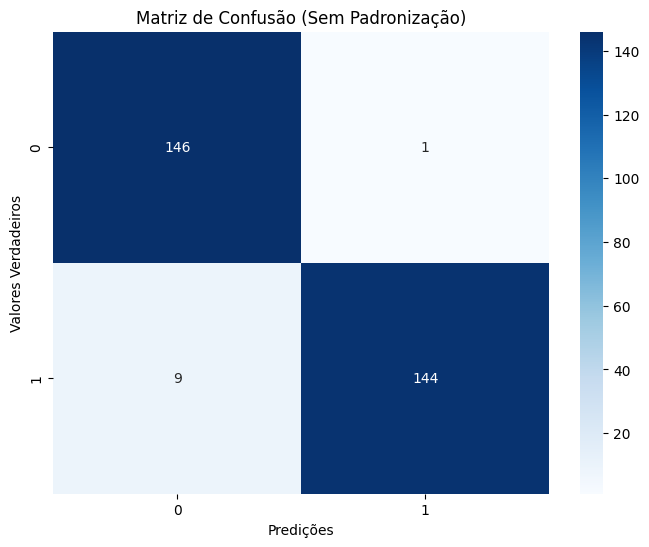

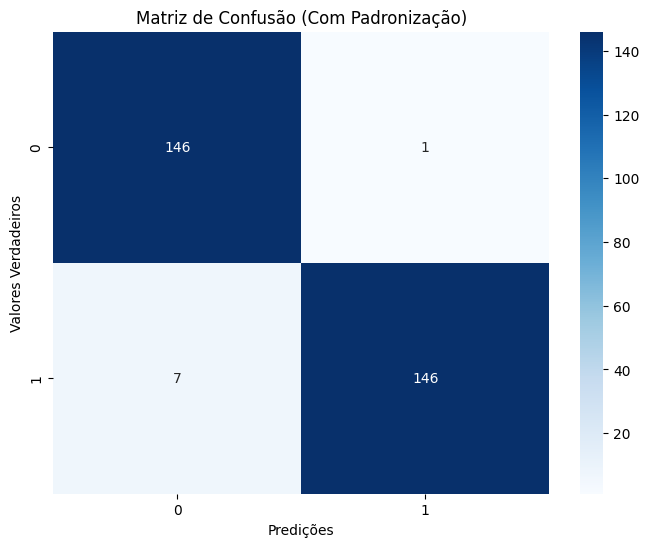

In [ ]:
# Matriz de confusão sem padronização
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Sem Padronização)')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

# Matriz de confusão com padronização
plt.figure(figsize=(8, 6))
sns.heatmap(cm_scaled, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Com Padronização)')
plt.xlabel('Predições')
plt.ylabel('Valores Verdadeiros')
plt.show()

### 8.2 Curva ROC

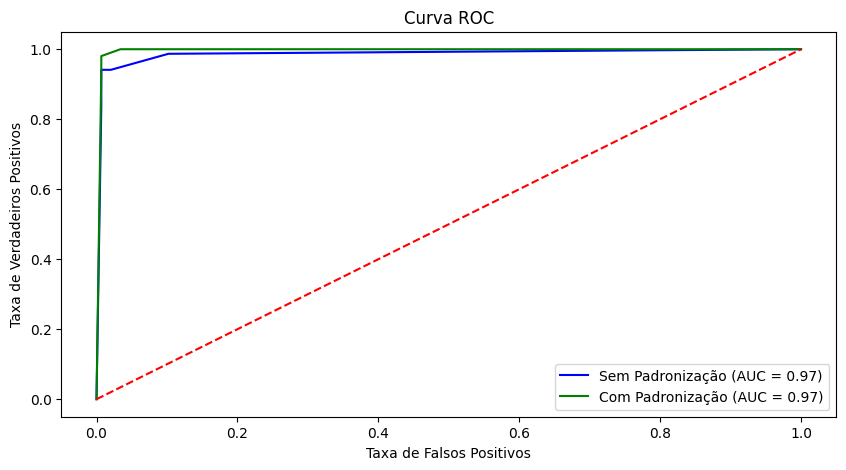

Precisão (Sem Padronização): 0.9666666666666667
Precisão (Com Padronização): 0.9733333333333334
AUC (Sem Padronização): 0.9671868747499
AUC (Com Padronização): 0.9737228224623183


In [ ]:
# Plotando a curva ROC
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', label=f'Sem Padronização (AUC = {roc_auc:.2f})')
plt.plot(fpr_scaled, tpr_scaled, color='green', label=f'Com Padronização (AUC = {roc_auc_scaled:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Comentários sobre os resultados
print("Precisão (Sem Padronização):", accuracy)
print("Precisão (Com Padronização):", accuracy_scaled)
print("AUC (Sem Padronização):", roc_auc)
print("AUC (Com Padronização):", roc_auc_scaled)

### 8.3 Erro em função do k

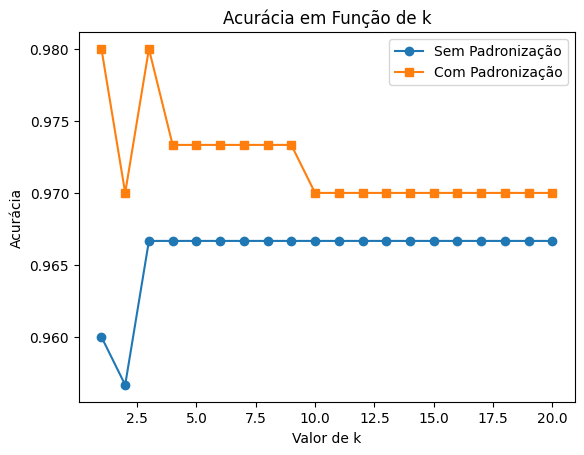

In [ ]:
# Variando o valor de k para dados sem padronização
k_range = range(1, 21)
scores_unscaled = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores_unscaled.append(knn.score(X_test, y_test))

# Variando o valor de k para dados com padronização
scores_scaled = []
for k in k_range:
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    knn_scaled.fit(X_train_scaled, y_train_scaled)
    scores_scaled.append(knn_scaled.score(X_test_scaled, y_test_scaled))

# Plotando o gráfico da acurácia em função de k para dados sem padronização e com padronização
plt.plot(k_range, scores_unscaled, label='Sem Padronização', marker='o')
plt.plot(k_range, scores_scaled, label='Com Padronização', marker='s')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.title('Acurácia em Função de k')
plt.legend()
plt.show()

## 9. Analisando os Resultados
A padronização dos dados geralmente melhora o desempenho do algoritmo kNN, especialmente quando as variáveis têm escalas muito diferentes. Isso ocorre porque a padronização garante que todas as variáveis contribuam igualmente para o cálculo da distância, evitando que variáveis com escalas maiores dominem o processo.


## 10. Conclusão
A padronização dos dados antes de aplicar o kNN é crucial para garantir que o modelo funcione de forma eficaz. Sem padronização, as variáveis em escalas diferentes podem prejudicar a performance do modelo, levando a uma classificação imprecisa. Com a padronização, o kNN é capaz de calcular distâncias de maneira consistente, resultando em uma melhor separação das classes, maior precisão, e melhores métricas de avaliação (como a AUC e a matriz de confusão).